In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

In [5]:
sales = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Statistical python case study\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv")
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

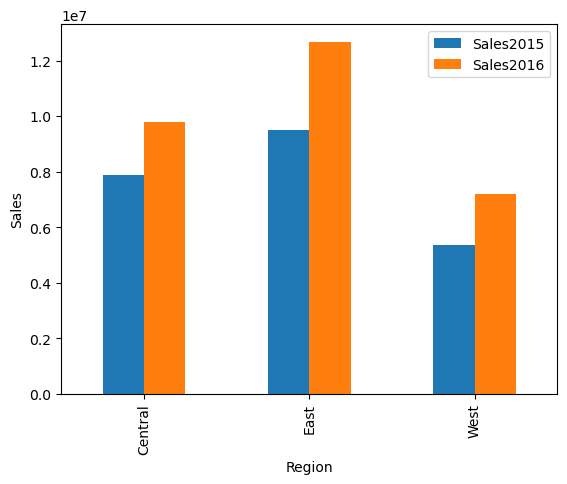

In [17]:
round(sales.groupby('Region')[['Sales2015','Sales2016']].sum(),2).plot(kind='bar',xlabel = 'Region',ylabel = 'Sales')
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

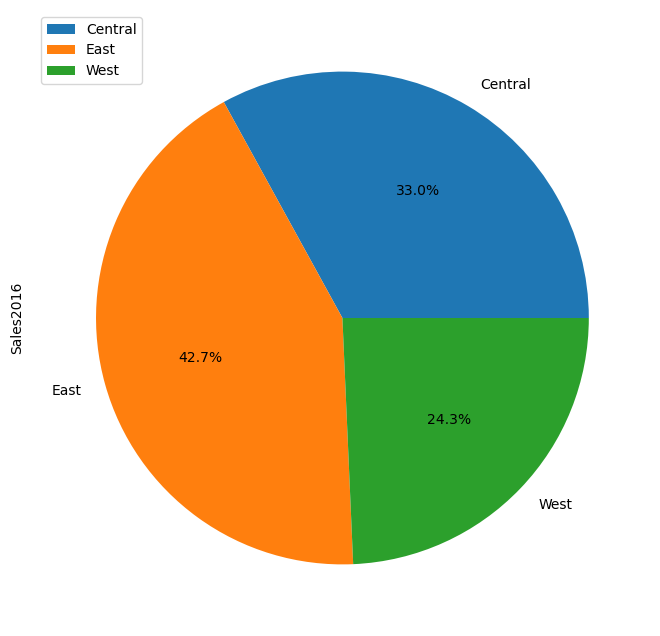

In [22]:
round(sales.groupby('Region')[['Sales2016']].sum(),2).plot(kind = 'pie',subplots = True,figsize = (8,8),autopct = '%1.1f%%')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

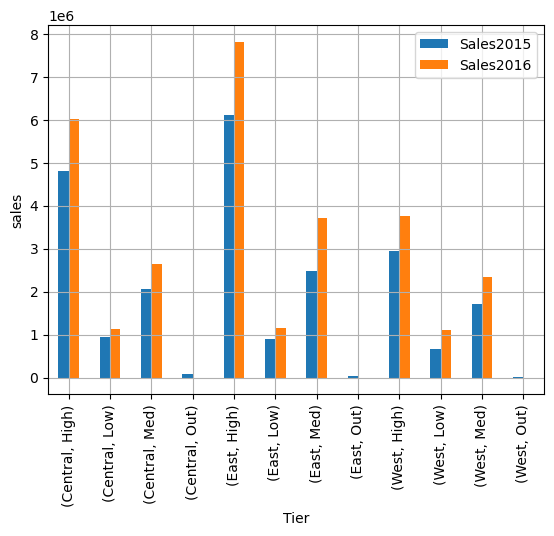

In [38]:
round(sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum(),2).plot(kind='bar',ylabel = 'sales',xlabel = 'Tier',grid=True)
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?


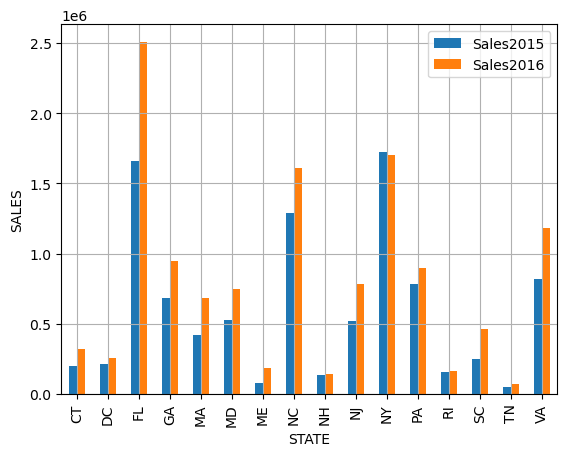

In [37]:
East_Sales = sales.loc[sales.Region == 'East']
East_Sales.groupby('State')[['Sales2015','Sales2016']].sum().plot(kind = 'bar',xlabel='STATE',ylabel='SALES',grid=True)
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


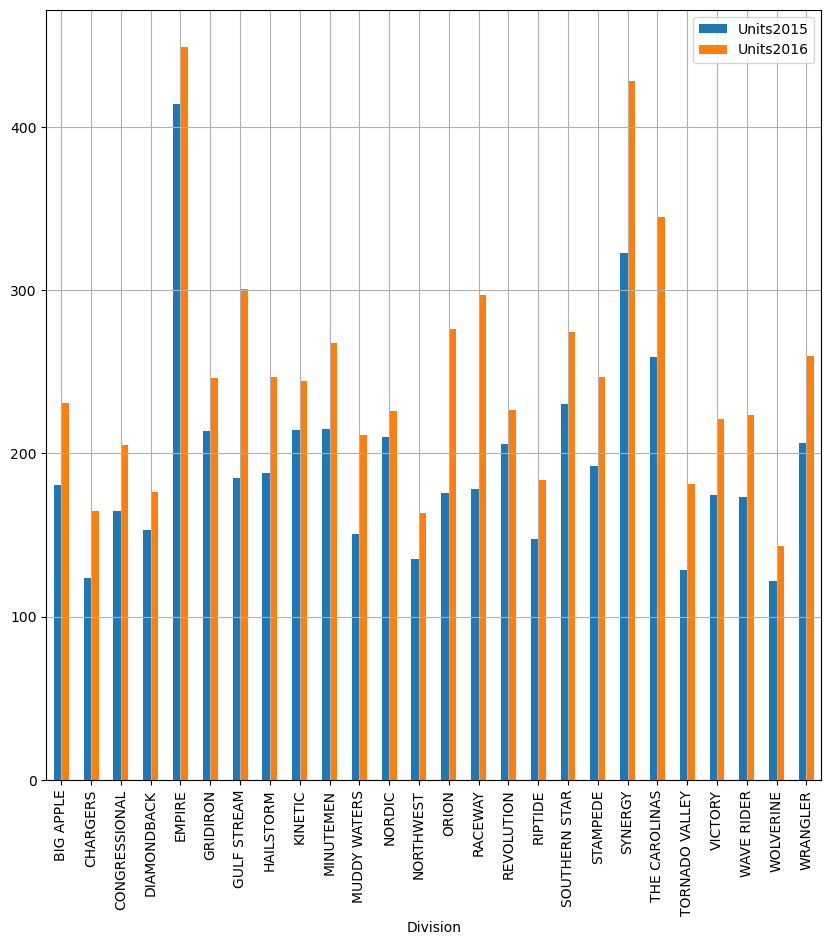

In [47]:
Tier_Sales = sales.loc[sales.Tier=='High']
Tier_Sales.groupby('Division')[['Units2015','Units2016']].sum().plot(kind='bar',grid=True,figsize=(10,10))
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
##### Jan - Mar : Q1
#####  Apr - Jun : Q2
#####  Jul - Sep : Q3
#####  Oct - Dec : Q4 

In [63]:
sales['Qtr']= np.where(sales.Month.isin(['Jan','Feb','Mar']),'Q1',np.where(sales.Month.isin(['Apr','May','Jun']),'Q2',np.where(sales.Month.isin(['Jul','Aug','Sep']),'Q3','Q4')))
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

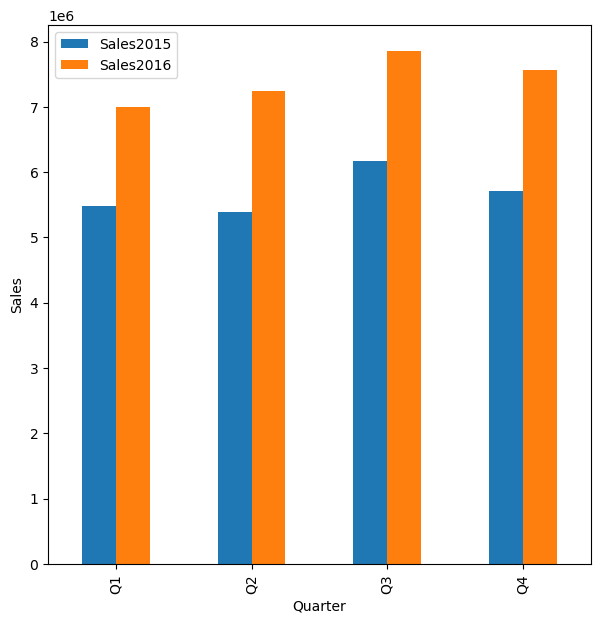

In [66]:
round(sales.groupby('Qtr')[['Sales2015','Sales2016']].sum(),2).plot(kind='bar',xlabel = 'Quarter',ylabel = 'Sales',figsize = (7,7))
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.(Draw 4 pie charts representing a Quarter for each Tier)

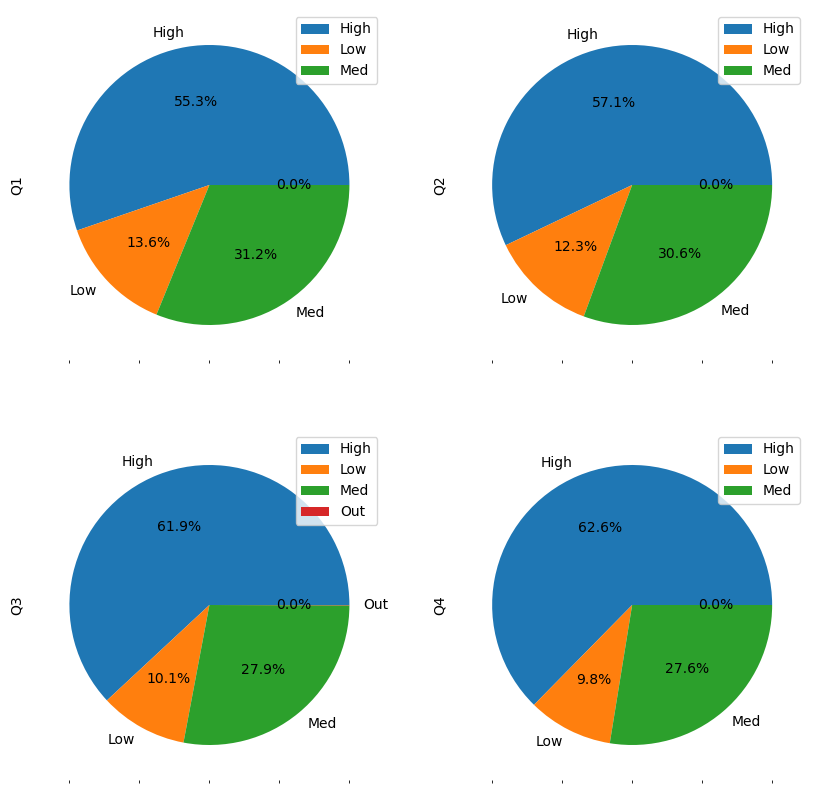

In [91]:
Qt_Tier_2016 = abs(pd.pivot_table(data = sales,index = 'Tier',columns = 'Qtr',values = 'Sales2016',aggfunc='sum'))
Qt_Tier_2016.plot(kind='pie',subplots=True,figsize=(10,10),layout = (2,2),autopct = '%1.1f%%')
plt.show()